<a href="https://colab.research.google.com/github/Amruthakap3/AML/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression on Epicurious - Recipes with Rating and Nutrition**

In [52]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sbn
import numpy as np
# Import Epicurious dataset
data = pd.read_csv('https://raw.githubusercontent.com/Amruthakap3/AML/main/epi_r.csv')
df = data[['title','rating', 'calories', 'protein','fat','sodium','#cakeweek','vegetarian' ]]
#Discribe the data frame
df.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20052 entries, 0 to 20051
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       20052 non-null  object 
 1   rating      20052 non-null  float64
 2   calories    15935 non-null  float64
 3   protein     15890 non-null  float64
 4   fat         15869 non-null  float64
 5   sodium      15933 non-null  float64
 6   #cakeweek   20052 non-null  float64
 7   vegetarian  20052 non-null  float64
dtypes: float64(7), object(1)
memory usage: 1.2+ MB


,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,30 days of groceries,advance prep required,alabama,alaska,alcoholic,almond,amaretto,anchovy,anise,anniversary,anthony bourdain,aperitif,appetizer,apple,apple juice,apricot,arizona,artichoke,arugula,asian pear,asparagus,aspen,atlanta,australia,avocado,back to school,backyard bbq,bacon,bake,banana,barley,...,vegan,vegetable,vegetarian,venison,vermont,vermouth,vinegar,virginia,vodka,waffle,walnut,wasabi,washington,"washington, d.c.",watercress,watermelon,wedding,weelicious,west virginia,westwood,wheat/gluten-free,whiskey,white wine,whole wheat,wild rice,windsor,wine,winter,wisconsin,wok,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
count,20052.000000,1.593500e+04,15890.000000,1.586900e+04,1.593300e+04,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,...,20052.00000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000,20052.000000
mean,3.714467,6.322958e+03,100.160793,3.468775e+02,6.225975e+03,0.000299,0.000050,0.000848,0.001346,0.000349,0.005436,0.000150,0.000100,0.041642,0.029124,0.001945,0.002244,0.005785,0.005536,0.000100,0.000598,0.068422,0.033214,0.000299,0.013415,0.000399,0.007630,0.013864,0.000997,0.010323,0.000050,0.000349,0.000349,0.013615,0.010074,0.046778,0.029274,0.220078,0.008827,0.002494,...,0.09231,0.104079,0.341412,0.000449,0.000249,0.000549,0.032815,0.000549,0.006234,0.000050,0.021195,0.001147,0.001297,0.000499,0.006882,0.003591,0.005585,0.001646,0.000050,0.000050,0.244664,0.002843,0.024287,0.001496,0.000898,0.000050,0.009525,0.154548,0.000199,0.005087,0.001247,0.026332,0.000050,0.000299,0.014861,0.000150,0.000349,0.001396,0.000948,0.022741
std,1.340829,3.590460e+05,3840.318527,2.045611e+04,3.333182e+05,0.017296,0.007062,0.029105,0.036671,0.018681,0.073530,0.012231,0.009987,0.199774,0.168159,0.044060,0.047321,0.075840,0.074197,0.009987,0.024456,0.252475,0.179198,0.017296,0.115047,0.019971,0.087019,0.116929,0.031567,0.101080,0.007062,0.018681,0.018681,0.115888,0.099864,0.211169,0.168577,0.414309,0.093539,0.049874,...,0.28947,0.305371,0.474195,0.021181,0.015789,0.023416,0.178156,0.023416,0.078710,0.007062,0.144037,0.033849,0.035986,0.022327,0.082675,0.059816,0.074529,0.040535,0.007062,0.007062,0.429898,0.053242,0.153942,0.038652,0.029948,0.007062,0.097134,0.361482,0.014123,0.071142,0.035288,0.160123,0.007062,0.017296,0.121001,0.012231,0.018681,0.037343,0.030768,0.149080
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0

# Drop duplicate recipe

In [53]:
print("Data shape before duplicates droped:  "+ str(df.shape))
df = df.drop_duplicates(subset=['title'], keep='last')
df = df[['rating', 'calories', 'protein','fat','sodium','#cakeweek','vegetarian' ]]
print("Data shape after duplicates droped:  "+ str(df.shape))

Data shape before duplicates droped:  (20052, 8)
Data shape after duplicates droped:  (17736, 7)


# Analysys of target catogory

Looking into the mean values for the catogory data, it is very clear most of the catogory has very high inbalnce in class, we take, #cakeweek for an instance, it has 14k negative samples and 6 positive samples.

There are few approches we can take here

1.   Random Oversampling 
2.   Under sampling (Not applicable here, becouse we have only very few positive samples)
3. Synthetic Minority Over-Sampling Technique (SMOTE)

I didnt applied any of them, insted i picked couple of classes to experiment with


1.   #cackeweek  
2.   vegetarian



In [54]:
print("Number of Positive class for #vegetarian:  "+ str((data['vegetarian']== 1).sum()))
print("Number of Positive class for #cakeweek:  "+ str((data['#cakeweek']== 1).sum()))

Number of Positive class for #vegetarian:  6846
Number of Positive class for #cakeweek:  6


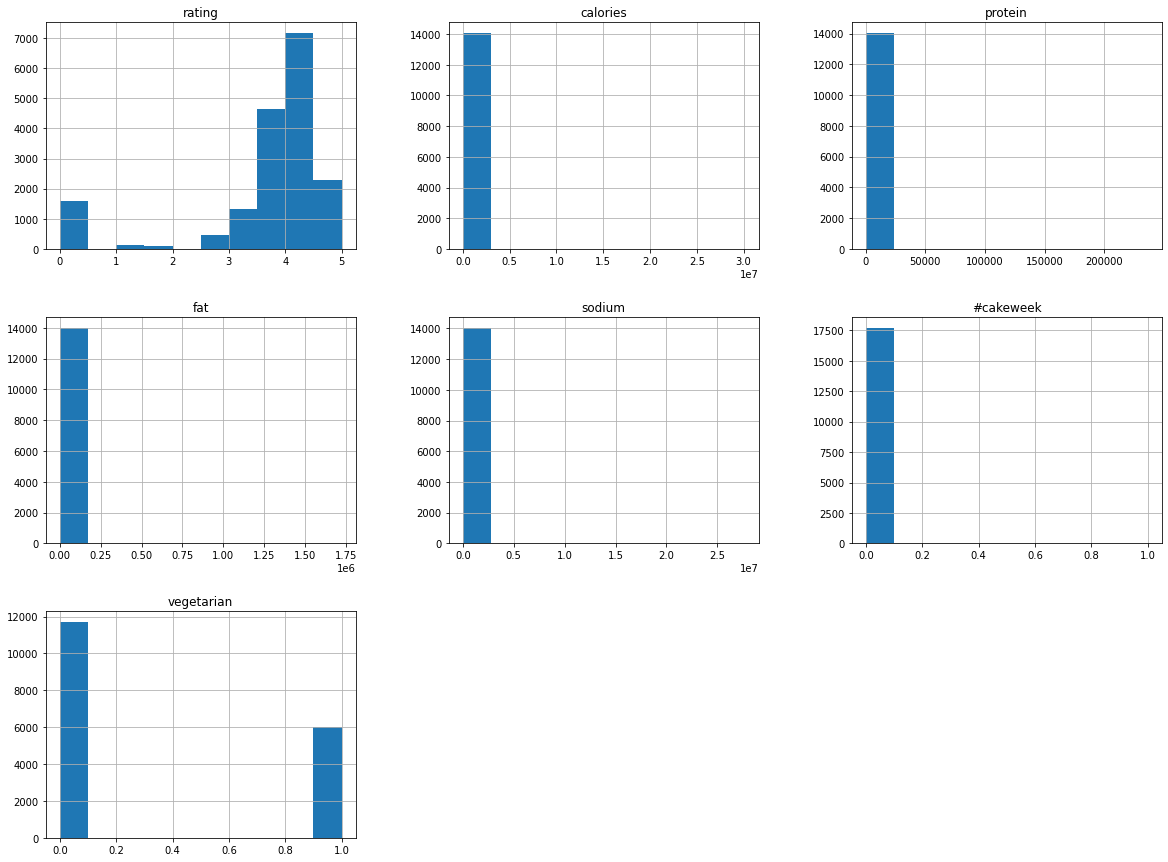

In [55]:
df.hist(bins=10, figsize=(20,15))
plt.show()

# Compute the pair-wise Pearson correlation coefficients

In [56]:
#define the data 
X = df[['rating', 'calories', 'protein','fat','sodium']]
cakeweek_Y = df[['#cakeweek']]
vegetarian_Y = df[['vegetarian']]

#Compute Pearson correlation 
corr_matrix = X.corr()
corr_matrix["rating"].sort_values(ascending=False)


rating      1.000000
protein     0.012460
sodium      0.008126
calories    0.007692
fat         0.007032
Name: rating, dtype: float64

In [57]:
#clean the data & data transformers using sklearn.pipeline 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler())   
        #combined attributes           
])



X_tr = num_pipeline.fit_transform(X)
scaled_X = pd.DataFrame(X_tr, columns=X.columns, index=X.index)
scaled_X.head()


,rating,calories,protein,fat,sodium
0,-0.920126,-0.014907,-0.014748,-0.015165,-0.015448
1,0.495911,-0.014975,-0.018531,-0.014335,-0.012655
2,0.023899,-0.015677,-0.022314,-0.015165,-0.016699
3,0.967924,-0.015128,-0.021368,-0.014595,-0.016242
4,-0.448114,-0.014550,-0.017900,-0.013868,-0.015788


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb25a36bc50>,
      dtype=object)

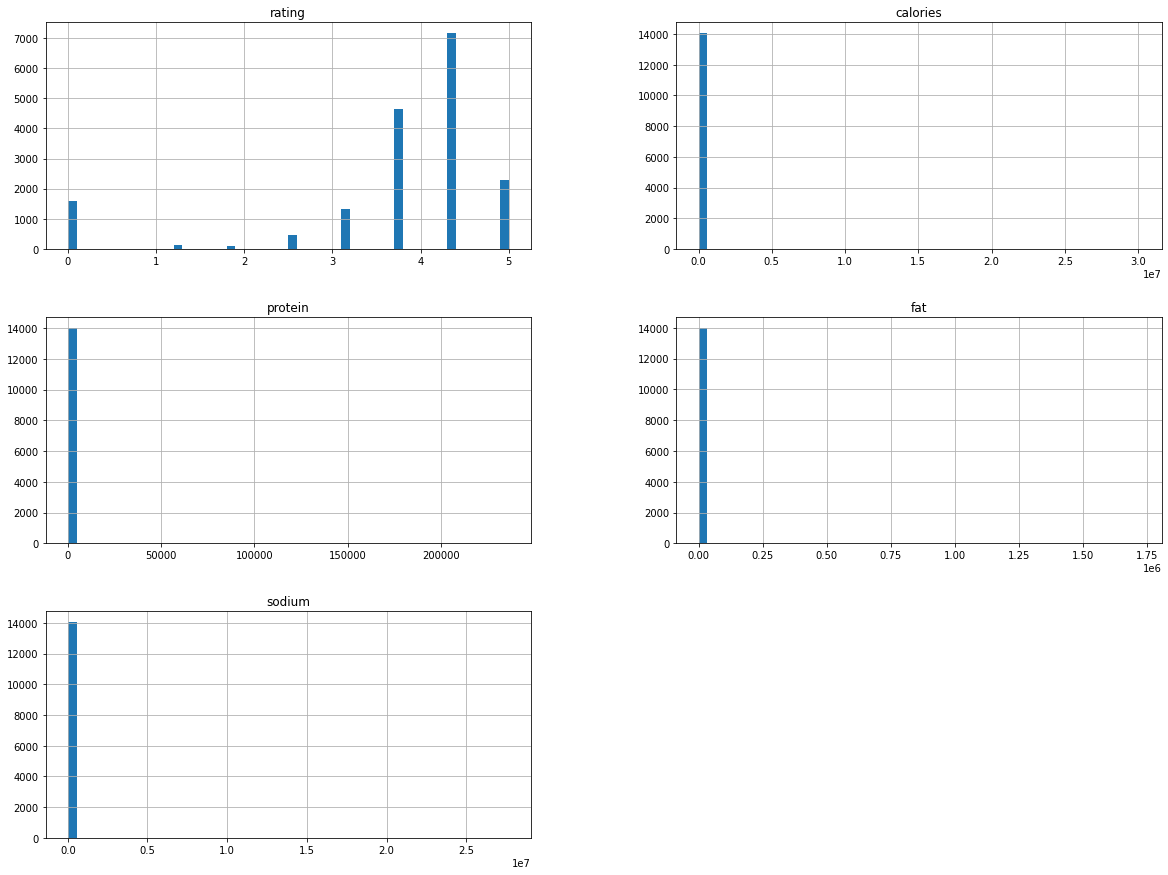

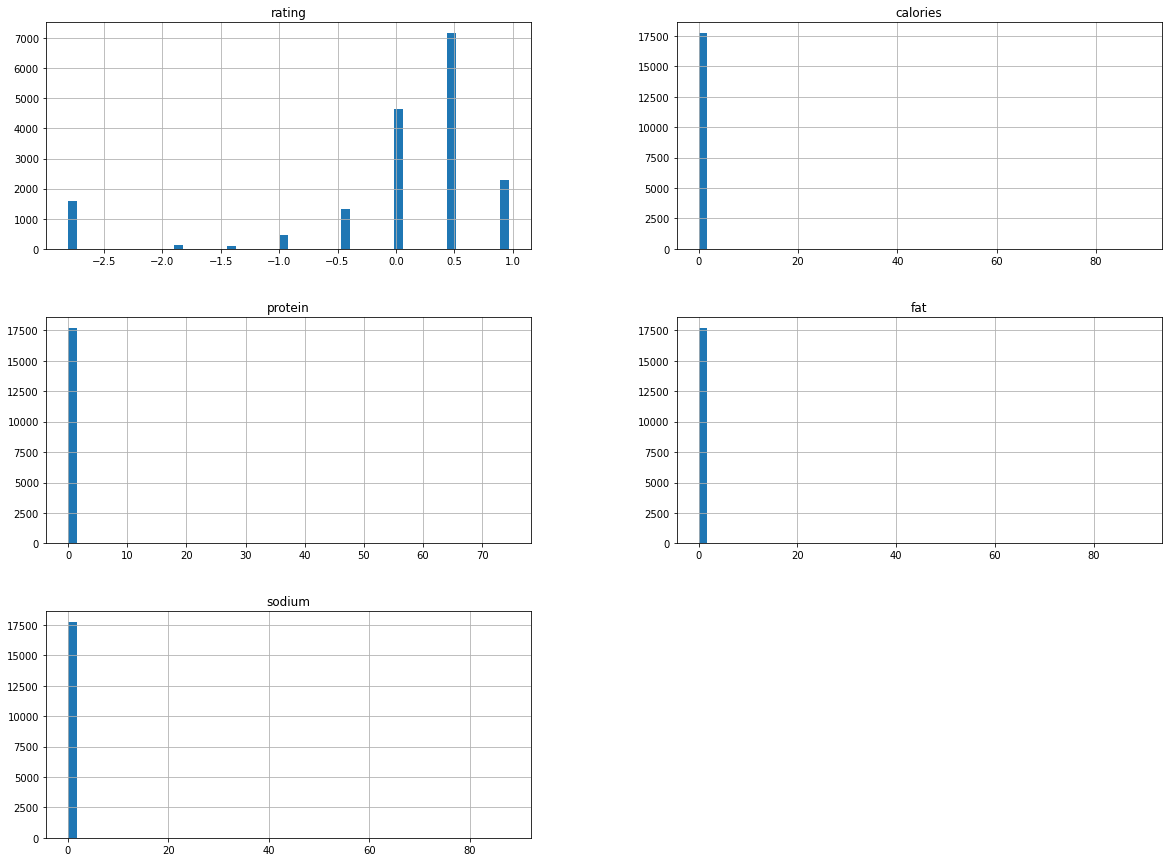

In [58]:
# show distributions before and after scaling
#Raw Data
X.hist(bins=50, figsize=(20,15))#
#Scaled Data:
pd.DataFrame(scaled_X).hist(bins=50, figsize=(20,15))

# Apply PCA 

In [59]:
# Apply PCA 

from sklearn.decomposition import PCA
# option 1: only select 2 components
pca1 = PCA(n_components=2)
pca1.fit(scaled_X)

# option 2: select all components that explain 95% of variance
pca2 = PCA()
pca2.fit(scaled_X)
cumsum = np.cumsum(pca2.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

# transform the data to its first 2 principal components
x_pca1 = pca1.transform(scaled_X)

# transform the data to its top 95% variance principal components
x_pca2 = pca2.transform(scaled_X)

In [60]:
# Let's examine the results

print ('Scaled data shape: ', scaled_X.shape)
print ('Transformed data shape: ', x_pca1.shape)
print ('Explained variance by 2 components: ', pca1.explained_variance_ratio_)
print ('#Components explaining 95% of variance: ', d)


Scaled data shape:  (17736, 5)
Transformed data shape:  (17736, 2)
Explained variance by 2 components:  [0.73903122 0.19998703]
#Components explaining 95% of variance:  3


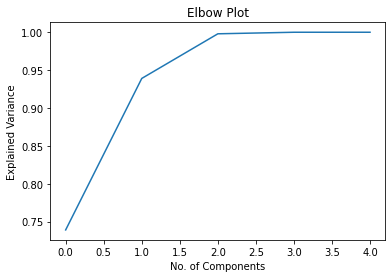

In [61]:
# The elbow plot of the explained variance

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('No. of Components')
plt.ylabel('Explained Variance')
plt.title('Elbow Plot')
plt.show()

Text(0, 0.5, 'Second Principal Component')

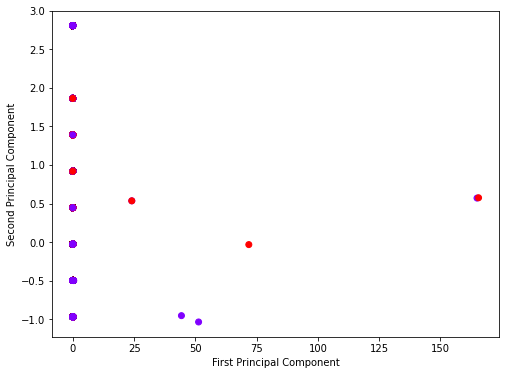

In [62]:
# Plot the two components
# Clearly the two components are enough to separate the two classes

plt.figure(figsize=(8,6))
plt.scatter(x_pca1[:,0],x_pca1[:,1],c=vegetarian_Y['vegetarian'],cmap='rainbow')

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Logistic regression using 80-20 hold out #vegetarian

In [63]:
# Split the data set and perform logistic regression  #cakeweek	
from sklearn.model_selection import train_test_split

# Try the scaled data set
X = scaled_X
Y = vegetarian_Y['vegetarian']

# Split the dataset into the training set (80%) and testing (20%)
# random_state Controls the shuffling applied to the data before applying the split. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)


# Perform logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17736, 5)
#Training and testing cases (14188, 5) (3548, 5)
Confusion matrix:


,0,1
0,2322,0
1,1226,0


# Logistic regression using 80-20 hold out #cakeweek

In [64]:
# Split the data set and perform logistic regression  #cakeweek	
from sklearn.model_selection import train_test_split

# Try the scaled data set as well as the PCA-trasformed data sets x_pca1 and x_pca2
X = scaled_X
Y = cakeweek_Y['#cakeweek']

# Split the dataset 
# random_state Controls the shuffling applied to the data before applying the split. 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Perform logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

# measure model accuracy
Y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
import pandas as pd
import numpy as np

labels = [0, 1]
cm = confusion_matrix(Y_test, Y_pred, labels=labels)

print ('#Total cases', X.shape)
print ('#Training and testing cases', X_train.shape, X_test.shape)
print ('Confusion matrix:')
pd.DataFrame(cm, index=labels, columns=labels)


#Total cases (17736, 5)
#Training and testing cases (14188, 5) (3548, 5)
Confusion matrix:


,0,1
0,3546,0
1,2,0
